In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [82]:
# from google.colab import drive
# drive.mount('/content/drive')

In [83]:
data = pd.read_csv('heart.csv')

In [84]:
data.head(20)




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [85]:
# data['cp'] = data['nyeri dada']
# data['trestbps'] = data['tekanan darah']
# data['chol'] = data['kolestrol']
# data['fbs'] = data['kadar gula']
# data['restecg'] = data['elektrokardiografi']
# data['thalach'] = data['denyut jantung']
# data['exang'] = data['angina']
# data['oldpeak'] = data['depresi']
# data['ca'] = data['jumlah pembuluh darah besar']
# data['thal'] = data['jenis talasemia']

In [86]:
data.shape

(1025, 14)

In [87]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [88]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [90]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [91]:
# data['DEATH_EVENT'] = data['DEATH_EVENT'].map({0: 'tidak survive', 1: 'survive'})

In [92]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [93]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: >

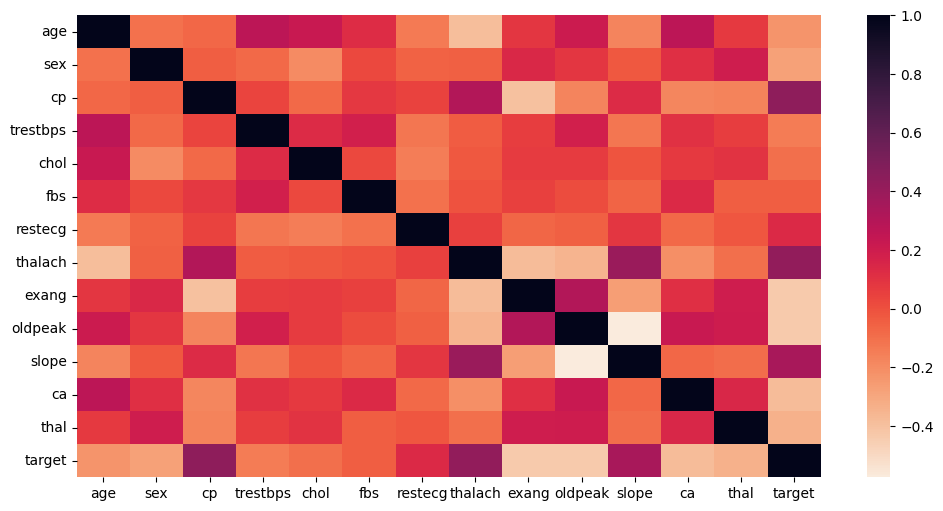

In [94]:
f, ax = plt.subplots(figsize=(12,6))
corr = data.corr()
sns.heatmap(corr, ax=ax, cmap="rocket_r" )

In [95]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<ipython-input-96-c91f1275b415>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color='black', ax=ax)


<Axes: xlabel='age', ylabel='Density'>

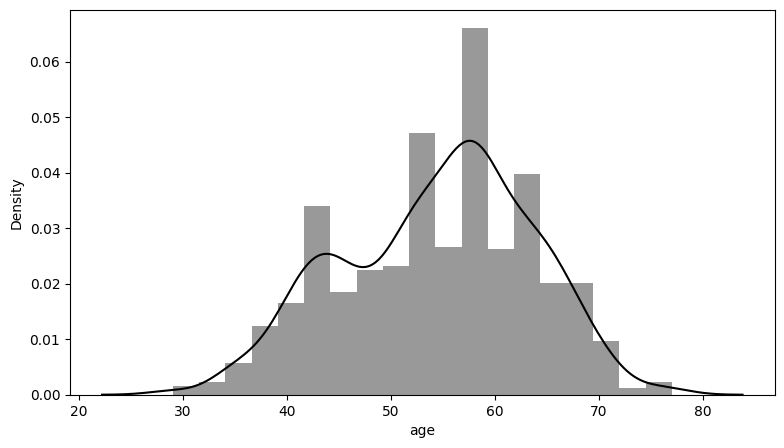

In [96]:
f = plt.figure(figsize=(20, 5))
ax = f.add_subplot(121)
sns.distplot(data['age'], color='black', ax=ax)

<ipython-input-97-319aa2def847>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color='red', ax=ax)


<Axes: xlabel='age', ylabel='Density'>

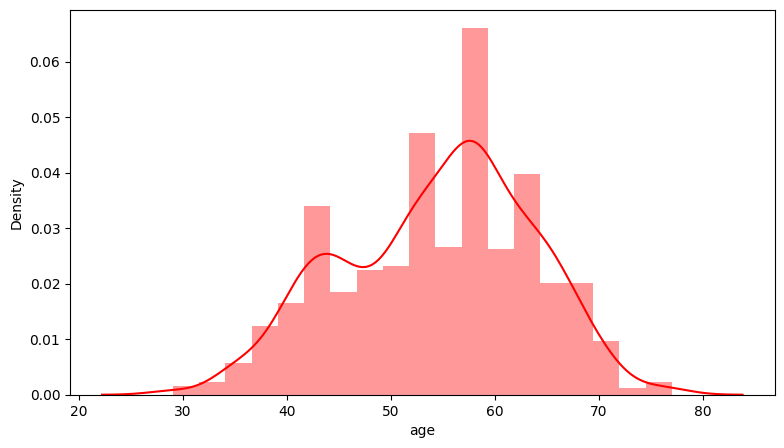

In [97]:
f = plt.figure(figsize=(20, 5))
ax = f.add_subplot(121)
sns.distplot(data['age'], color='red', ax=ax)

In [98]:
# data['DEATH_EVENT'] = data['DEATH_EVENT'].map({0: 'tidak survive', 1: 'survive'})


In [99]:
# f = plt.figure(figsize=(15, 5))
# sns.countplot(data['DEATH_EVENT'], palette = 'Spectral')
# plt.xticks(rotation=90)
# plt.show()

In [100]:
X = data.drop('target', axis=1)

In [101]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [102]:
y = data['target']

In [103]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
model = []
accuracy = []


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [107]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Mengompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)





Epoch 1/10
84/84 [==============================] - 2s 6ms/step - loss: 0.6258 - accuracy: 0.6369 - val_loss: 0.5348 - val_accuracy: 0.7870
Epoch 2/10
84/84 [==============================] - 0s 4ms/step - loss: 0.5279 - accuracy: 0.7664 - val_loss: 0.4489 - val_accuracy: 0.8107
Epoch 3/10
84/84 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.7946 - val_loss: 0.4203 - val_accuracy: 0.7929
Epoch 4/10
84/84 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.8080 - val_loss: 0.3988 - val_accuracy: 0.8047
Epoch 5/10
84/84 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.8289 - val_loss: 0.3951 - val_accuracy: 0.8166
Epoch 6/10
84/84 [==============================] - 0s 4ms/step - loss: 0.4098 - accuracy: 0.8333 - val_loss: 0.3860 - val_accuracy: 0.8284
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8318 - val_loss: 0.3790 - val_accuracy: 0.7988
Epoch 8/10
84/84 [==

In [108]:
from keras.callbacks import EarlyStopping

# Melatih model dengan Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
42/42 [==============================] - 1s 6ms/step - loss: 0.3602 - accuracy: 0.8557 - val_loss: 0.3585 - val_accuracy: 0.8402
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 0.3489 - accuracy: 0.8571 - val_loss: 0.3559 - val_accuracy: 0.8402
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 0.3422 - accuracy: 0.8661 - val_loss: 0.3513 - val_accuracy: 0.8580
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8720 - val_loss: 0.3503 - val_accuracy: 0.8521
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.8720 - val_loss: 0.3479 - val_accuracy: 0.8521
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.8810 - val_loss: 0.3483 - val_accuracy: 0.8580
Epoch 7/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3239 - accuracy: 0.8765 - val_loss: 0.3468 - val_accuracy: 0.8580
Epoch 8/10
42/42 [==

In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                896       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (

In [110]:
# acc = history.history['acc']
# val_acc = history.history

In [116]:

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.8).astype("int32")

# Menampilkan hasil prediksi
print("Prediksi probabilitas:", y_pred[:10])
print("Prediksi kelas:", y_pred_class[:10])

7/7 [==============================] - 0s 2ms/step
Prediksi probabilitas: [[0.7448668 ]
 [0.01918102]
 [0.9986652 ]
 [0.7163888 ]
 [0.92663705]
 [0.00505914]
 [0.47782066]
 [0.8106855 ]
 [0.03928626]
 [0.77357197]]
Prediksi kelas: [[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [118]:

# Contoh fungsi preprocessing (disesuaikan dengan model Anda)
def preprocess_input(user_input):
    # Mengubah input user menjadi numpy array dan reshape sesuai kebutuhan model
    input_array = np.array(user_input).reshape(1, -1)
    return input_array

# Muat model yang sudah dilatih

def make_prediction(user_input):
    # Fitur yang diharapkan oleh model


    # Lakukan preprocessing pada input user
    processed_input = preprocess_input(user_input)

    # Buat prediksi menggunakan model yang telah dilatih
    y_pred = model.predict(processed_input)
    y_pred_class = (y_pred > 0.8).astype("int32")

    # Tampilkan hasil prediksi
    print("Prediksi probabilitas:", y_pred)
    print("Prediksi kelas:", y_pred_class)

# Contoh penggunaan
user_input = [58,	1,	1,	100,	248,	0,	0,	122,	0,	1.0,	1,	0,	2	]
 # Contoh input yang sesuai dengan fitur yang diharapkan
make_prediction(user_input)


1/1 [==============================] - 0s 19ms/step
Prediksi probabilitas: [[1.0971716e-22]]
Prediksi kelas: [[0]]


In [113]:
# Evaluasi model pada data testing
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


7/7 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.8720
Test Loss: 0.3043803572654724
Test Accuracy: 0.8720378875732422
